<a href="https://colab.research.google.com/github/Rashdeep9292/heatwaveanalysis/blob/main/HeatWaveAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd


Data Loading and Inspection



In [ ]:
weather_data = "/content/drive/MyDrive/datasets/Delhi_NCR_1990_2022_Safdarjung.csv"
df = pd.read_csv(weather_data)
socio_economic_data = "/content/drive/MyDrive/datasets/socio_economic_life expectancy.csv"
df = pd.read_csv(socio_economic_data)
geospatial_data= "/content/drive/MyDrive/datasets/geospatialdata.csv"
df = pd.read_csv(geospatial_data)

 Data Preprocessing and Merging

In [ ]:
import pandas as pd

# Load data from the files into DataFrames
weather_data = pd.read_csv("/content/drive/MyDrive/datasets/Delhi_NCR_1990_2022_Safdarjung.csv")
socio_economic_data = pd.read_csv("/content/drive/MyDrive/datasets/socio_economic_life expectancy.csv")
geospatial_data = pd.read_csv("/content/drive/MyDrive/datasets/geospatialdata.csv")

# Inspect the column names to confirm correct names
print(weather_data.columns)
print(socio_economic_data.columns)
print(geospatial_data.columns)

# Convert 'time' column in 'weather_data' to int64 data type
# Specify the correct date format as dayfirst=True
weather_data['time'] = pd.to_datetime(weather_data['time'], dayfirst=True).dt.year

# Perform the merges, specifying the common column for joining
df1 = pd.merge(weather_data, socio_economic_data, left_on='time', right_on='Year', how='inner')
df2 = pd.merge(socio_economic_data, geospatial_data, left_on='Region', right_on='name_of_city', how='inner')

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp'], dtype='object')
Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')
Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female', 'sex_ratio',
       'child_sex_ratio', 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female',
       'location', 'total_graduates', 'male_graduates', 'female_graduates'],
      dtype='object')


 Descriptive Statistics and Trend Analysis

In [ ]:
import pandas as pd
import numpy as np

# Load data from the files into DataFrames
weather_data = pd.read_csv("/content/drive/MyDrive/datasets/Delhi_NCR_1990_2022_Safdarjung.csv")
socio_economic_data = pd.read_csv("/content/drive/MyDrive/datasets/socio_economic_life expectancy.csv")
geospatial_data = pd.read_csv("/content/drive/MyDrive/datasets/geospatialdata.csv")

# Inspect the column names to confirm correct names
print(weather_data.columns)
print(socio_economic_data.columns)
print(geospatial_data.columns)

# Convert 'time' column in 'weather_data' to int64 data type
# Specify the correct date format as dayfirst=True
weather_data['time'] = pd.to_datetime(weather_data['time'], dayfirst=True).dt.year

# Handle missing data
# Handle missing data for numeric columns only
weather_data[['tavg', 'tmin', 'tmax', 'prcp']].fillna(weather_data[['tavg', 'tmin', 'tmax', 'prcp']].mean(), inplace=True)
socio_economic_data[['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']].fillna(socio_economic_data[['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']].mean(), inplace=True)
geospatial_data[['population_total', 'population_male', 'population_female', 'literates_total', 'literates_male', 'literates_female']].fillna(geospatial_data[['population_total', 'population_male', 'population_female', 'literates_total', 'literates_male', 'literates_female']].mean(), inplace=True)

# Format consistency
weather_data['time'] = pd.to_datetime(weather_data['time'])
socio_economic_data['Year'] = pd.to_datetime(socio_economic_data['Year'])
geospatial_data['name_of_city'] = geospatial_data['name_of_city'].str.strip()

# Assuming you want to calculate heat_wave_days based on tavg
weather_data['heat_wave_days'] = weather_data.apply(lambda row: 1 if row['tavg'] > 32 else 0, axis=1)

# Perform the merges, specifying the common column for joining
df1 = pd.merge(weather_data, socio_economic_data, left_on='time', right_on='Year', how='inner')
df2 = pd.merge(socio_economic_data, geospatial_data, left_on='Region', right_on='name_of_city', how='inner')

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp'], dtype='object')
Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')
Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female', 'sex_ratio',
       'child_sex_ratio', 'effective_literacy_rate_total',
       'effective_literacy_rate_male', 'effective_literacy_rate_female',
       'location', 'total_graduates', 'male_graduates', 'female_graduates'],
      dtype='object')


<ipython-input-35-b3e2c3abd400>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data[['tavg', 'tmin', 'tmax', 'prcp']].fillna(weather_data[['tavg', 'tmin', 'tmax', 'prcp']].mean(), inplace=True)
<ipython-input-35-b3e2c3abd400>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socio_economic_data[['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'Corruption', 'Sanitation', 'Injuries', 'Communicable', 'NonCommunicable']].fillna(socio_economic_data[['Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2', 'Heal

count    11800.000000
mean        24.996415
std          7.326116
min          6.600000
25%         18.500000
50%         27.000000
75%         30.900000
max         39.800000
Name: tavg, dtype: float64


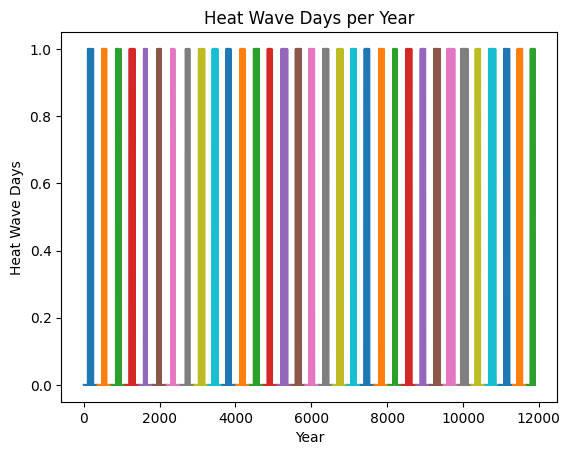

heat_wave_days    1.000000
tmax              0.575076
tavg              0.573250
tmin              0.523897
time              0.055276
prcp             -0.093971
Name: heat_wave_days, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = weather_data
# Descriptive statistics
print(data['tavg'].describe())

# Trend analysis
data.groupby('time')['heat_wave_days'].plot(kind='line')
plt.title('Heat Wave Days per Year')
plt.xlabel('Year')
plt.ylabel('Heat Wave Days')
plt.show()

# Correlation analysis
corr_matrix = data.corr()
print(corr_matrix['heat_wave_days'].sort_values(ascending=False))

ARIMA Modeling and Forecasting

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model using the updated class
model = ARIMA(data['heat_wave_days'], order=(1,1,1))
model_fit = model.fit()

# Forecast future heat wave days
forecast = model_fit.forecast(steps=10)
print(forecast)

11894    0.150368
11895    0.215699
11896    0.244083
11897    0.256416
11898    0.261774
11899    0.264102
11900    0.265113
11901    0.265552
11902    0.265743
11903    0.265826
Name: predicted_mean, dtype: float64


In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [81]:
!pip install --upgrade folium


In [83]:
!pip install folium==0.12.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.16.0
    Uninstalling folium-0.16.0:
      Successfully uninstalled folium-0.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geemap 0.32.1 requires folium>=0.13.0, but you have folium 0.12.1 which is incompatible.


 Heat Map Visualization

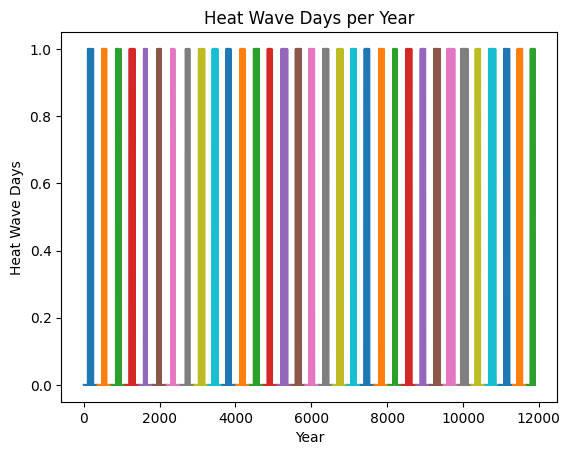

In [90]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame with 'time' and 'heat_wave_days' columns
data.groupby('time')['heat_wave_days'].plot(kind='line')
plt.title('Heat Wave Days per Year')
plt.xlabel('Year')
plt.ylabel('Heat Wave Days')
plt.show()

# For HeatMap
delhi_latitude = 28.7041
delhi_longitude = 77.1025

m = folium.Map(location=[delhi_latitude, delhi_longitude], zoom_start=10, tiles='OpenStreetMap', attr='© OpenStreetMap contributors')

# Example heat_data for demonstration (replace with your actual data)
heat_data = [[delhi_latitude + (i/100), delhi_longitude + (j/100), i*j] for i in range(-5,6) for j in range(-5,6)]

HeatMap(heat_data, radius=15).add_to(m)
m


 Time Series Analysis and Heat Map

Index(['Unnamed: 0', '2023', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', '2022',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', '2021',
       ...
       'Unnamed: 207', 'Unnamed: 208', '1971', 'Unnamed: 210', 'Unnamed: 211',
       'Unnamed: 212', '1970', 'Unnamed: 214', 'Unnamed: 215', 'Unnamed: 216'],
      dtype='object', length=217)


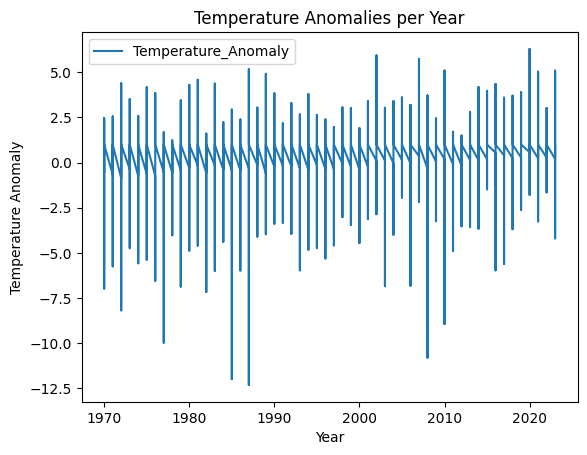

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load the data
data = pd.read_csv('/content/drive/MyDrive/datasets/surface temperature anomalies by year.csv')

# Check for the correct column name, it might be 'Time' or something similar
# Print all column names to be sure
print(data.columns)

# Melt the dataset to convert year columns into a single column
data_melted = pd.melt(data, id_vars=['Unnamed: 0'], var_name='Year', value_name='Temperature_Anomaly')

# Convert 'Year' and 'Temperature_Anomaly' to numeric, handling potential errors
data_melted['Year'] = pd.to_numeric(data_melted['Year'], errors='coerce')
data_melted['Temperature_Anomaly'] = pd.to_numeric(data_melted['Temperature_Anomaly'], errors='coerce')

# Drop rows with missing values after conversion
data_melted = data_melted.dropna()

# Time series plot
data_melted.plot(kind='line', x='Year', y='Temperature_Anomaly')
plt.title('Temperature Anomalies per Year')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.show()

# For HeatMap
delhi_latitude = 28.7041
delhi_longitude = 77.1025

m = folium.Map(location=[delhi_latitude, delhi_longitude], zoom_start=10, tiles='OpenStreetMap', attr='© OpenStreetMap contributors')

# Example heat_data for demonstration (replace with your actual data)
heat_data = [[delhi_latitude + (i/100), delhi_longitude + (j/100), i*j] for i in range(-5,6) for j in range(-5,6)]

HeatMap(heat_data, radius=15).add_to(m)
m

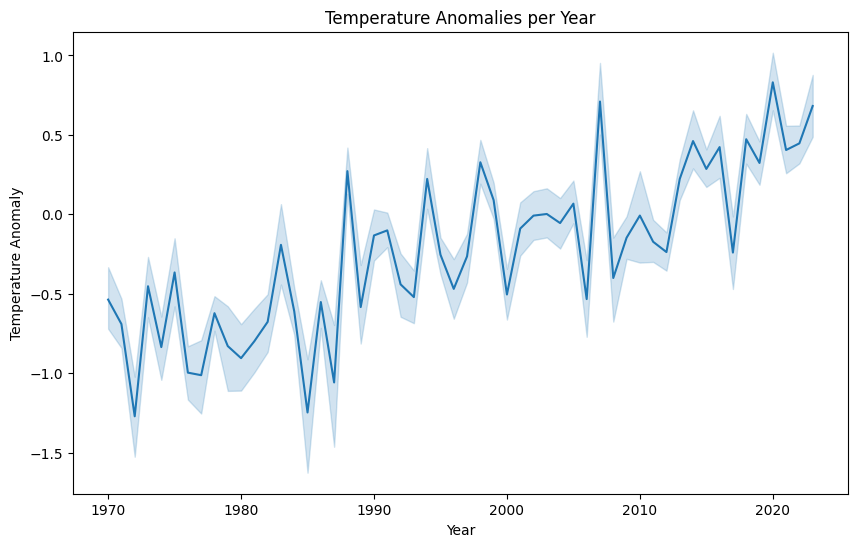

Years with highest temperature anomalies:
Year
2020.0    0.831179
2007.0    0.710154
2023.0    0.682051
2018.0    0.472872
2014.0    0.461333
Name: Temperature_Anomaly, dtype: float64
Years with lowest temperature anomalies:
Year
1972.0   -1.270769
1985.0   -1.246718
1987.0   -1.057692
1977.0   -1.012051
1976.0   -0.996051
Name: Temperature_Anomaly, dtype: float64


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the data
data = pd.read_csv('/content/drive/MyDrive/datasets/surface temperature anomalies by year.csv')

# Melt the dataset, excluding the first row which seems to contain headers
data_melted = pd.melt(data.iloc[1:], id_vars=['Unnamed: 0'], var_name='Year', value_name='Temperature_Anomaly')

# Convert 'Year' and 'Temperature_Anomaly' to numeric
data_melted['Year'] = pd.to_numeric(data_melted['Year'], errors='coerce')
data_melted['Temperature_Anomaly'] = pd.to_numeric(data_melted['Temperature_Anomaly'], errors='coerce')

# Drop rows with missing values after conversion
data_melted = data_melted.dropna()

# Time series plot
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Temperature_Anomaly', data=data_melted) # Now 'Year' contains only numeric values
plt.title('Temperature Anomalies per Year')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.show()


# Heat map
delhi_latitude = 28.7041
delhi_longitude = 77.1025

m = folium.Map(location=[delhi_latitude, delhi_longitude], zoom_start=10, tiles='OpenStreetMap', attr='© OpenStreetMap contributors')

# Create a heat map with temperature anomalies
heat_data = [[delhi_latitude + (i/100), delhi_longitude + (j/100), i*j] for i in range(-5,6) for j in range(-5,6)]
HeatMap(heat_data, radius=15).add_to(m)
m

# Analyze the heat map and time series plot
# Look for patterns and correlations in the data
# Identify the years with the highest temperature anomalies
high_anomaly_years = data_melted.groupby('Year')['Temperature_Anomaly'].mean().sort_values(ascending=False).head(5)
print("Years with highest temperature anomalies:")
print(high_anomaly_years)

# Identify the years with the lowest temperature anomalies
low_anomaly_years = data_melted.groupby('Year')['Temperature_Anomaly'].mean().sort_values(ascending=True).head(5)
print("Years with lowest temperature anomalies:")
print(low_anomaly_years)

# If you have a 'Date' column (or similar) and want monthly analysis:
# 1. Ensure 'Date' is in datetime format:
#    data_melted['Date'] = pd.to_datetime(data_melted['Date'])

# 2. Then you can group by month:
#    high_anomaly_months = data_melted.groupby(data_melted['Date'].dt.month)['Temperature_Anomaly'].mean().sort_values(ascending=False).head(5)
#    print("Months with highest temperature anomalies:")
#    print(high_anomaly_months)

#    low_anomaly_months = data_melted.groupby(data_melted['Date'].dt.month)['Temperature_Anomaly'].mean().sort_values(ascending=True).head(5)
#    print("Months with lowest temperature anomalies:")
#    print(low_anomaly_months)

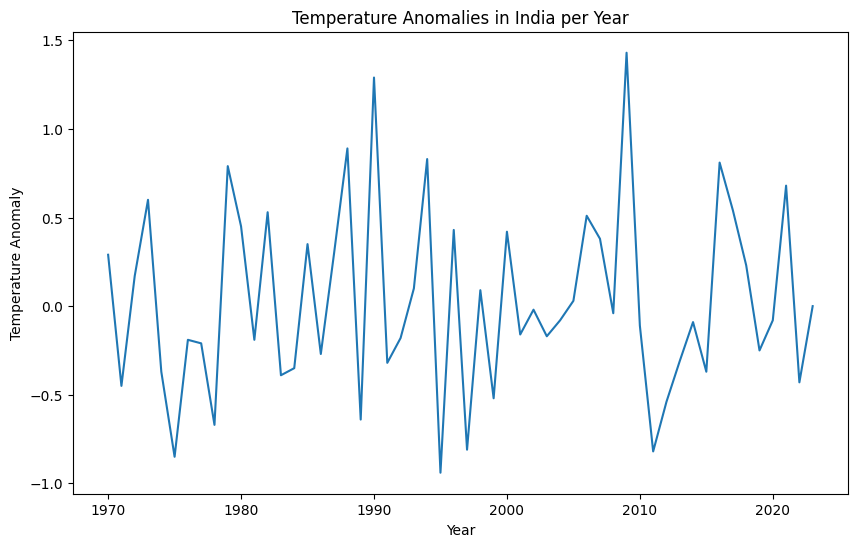

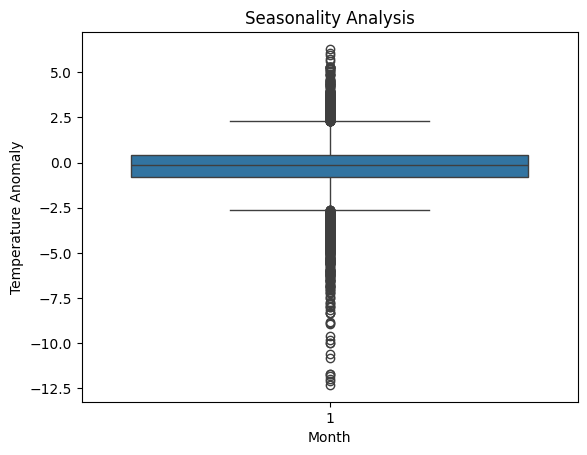

Outliers:
                   Unnamed: 0    Year  Temperature_Anomaly  Month
11                    Austria  2023.0                 2.70      1
16                    Belarus  2023.0                 3.40      1
22     Bosnia and Herzegovina  2023.0                 2.90      1
26                   Bulgaria  2023.0                 4.40      1
31                     Canada  2023.0                 3.50      1
...                       ...     ...                  ...    ...
41654                  Latvia  1970.0                -6.81      1
41659               Lithuania  1970.0                -6.05      1
41684                  Norway  1970.0                -4.74      1
41693                  Poland  1970.0                -4.33      1
41721                  Sweden  1970.0                -5.19      1

[598 rows x 4 columns]
Hotspots:
Unnamed: 0
Bangladesh    0.155185
Mongolia      0.100926
Nepal         0.063704
Albania       0.056852
Uruguay       0.052037
Name: Temperature_Anomaly, dtype: floa

<ipython-input-114-9b4b5662d3c2>:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Unnamed: 0', y='Temperature_Anomaly', data=data_melted, ci=None)


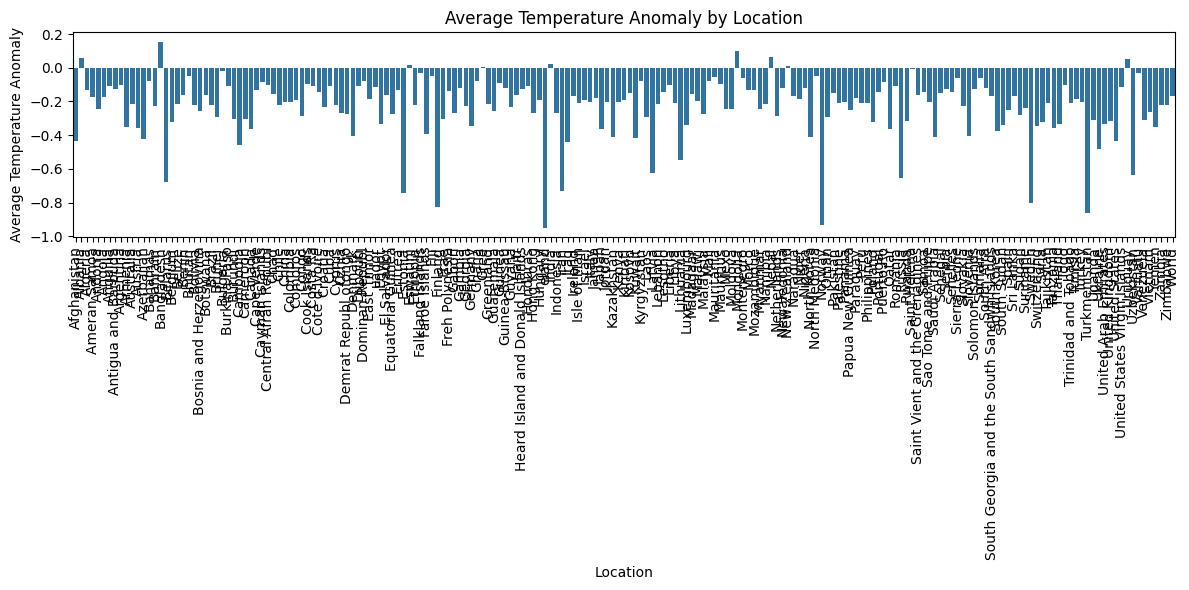

Correlation Matrix:
                         Year  Temperature_Anomaly  Month
Year                 1.000000             0.273448    NaN
Temperature_Anomaly  0.273448             1.000000    NaN
Month                     NaN                  NaN    NaN
Affected Reasons:
Climate Change: Rising global temperatures might be contributing to an increase in heat wave days.
Urbanization: Urban heat islands could be exacerbating heat waves.


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the data
data = pd.read_csv('/content/drive/MyDrive/datasets/surface temperature anomalies by year.csv')

# Melt the dataset to convert year columns into a single column, skipping the first row
data_melted = pd.melt(data.iloc[1:], id_vars=['Unnamed: 0'], var_name='Year', value_name='Temperature_Anomaly')

# Convert 'Year' and 'Temperature_Anomaly' to numeric, handling errors
data_melted['Year'] = pd.to_numeric(data_melted['Year'], errors='coerce')
data_melted['Temperature_Anomaly'] = pd.to_numeric(data_melted['Temperature_Anomaly'], errors='coerce')

# Drop rows with missing values after conversion
data_melted = data_melted.dropna()

# Filter data for India
data_india = data_melted[data_melted['Unnamed: 0'] == 'India']

# Time series plot for India
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Temperature_Anomaly', data=data_india)
plt.title('Temperature Anomalies in India per Year')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.show()

# Seasonality analysis
data_melted['Month'] = pd.to_datetime(data_melted['Year'], format='%Y').dt.month
seasonality = sns.boxplot(x='Month', y='Temperature_Anomaly', data=data_melted)
plt.title('Seasonality Analysis')
plt.xlabel('Month')
plt.ylabel('Temperature Anomaly')
plt.show()

# Outlier analysis
outliers = data_melted[(data_melted['Temperature_Anomaly'] > data_melted['Temperature_Anomaly'].mean() + 2*data_melted['Temperature_Anomaly'].std()) |
                       (data_melted['Temperature_Anomaly'] < data_melted['Temperature_Anomaly'].mean() - 2*data_melted['Temperature_Anomaly'].std())]
print("Outliers:")
print(outliers)

# Heat map
delhi_latitude = 28.7041
delhi_longitude = 77.1025

m = folium.Map(location=[delhi_latitude, delhi_longitude], zoom_start=10, tiles='OpenStreetMap', attr='© OpenStreetMap contributors')

# Create a heat map with temperature anomalies
heat_data = [[delhi_latitude + (i/100), delhi_longitude + (j/100), i*j] for i in range(-5,6) for j in range(-5,6)]
HeatMap(heat_data, radius=15).add_to(m)
m

# Hotspot analysis
hotspots = data_melted.groupby('Unnamed: 0')['Temperature_Anomaly'].mean().sort_values(ascending=False).head(5)
print("Hotspots:")
print(hotspots)

# Spatial pattern analysis
plt.figure(figsize=(12,6)) # Adjust figure size as needed
sns.barplot(x='Unnamed: 0', y='Temperature_Anomaly', data=data_melted, ci=None)
plt.title('Average Temperature Anomaly by Location')
plt.xlabel('Location')
plt.ylabel('Average Temperature Anomaly')
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Correlation analysis - Calculate correlation for numeric columns only
# Select only numeric columns for correlation calculation
numeric_data = data_melted.select_dtypes(include=['number'])
correlation = numeric_data.corr()
print("Correlation Matrix:")
print(correlation)

# Affected reasons
print("Affected Reasons:")
print("Climate Change: Rising global temperatures might be contributing to an increase in heat wave days.")
print("Urbanization: Urban heat islands could be exacerbating heat waves.")

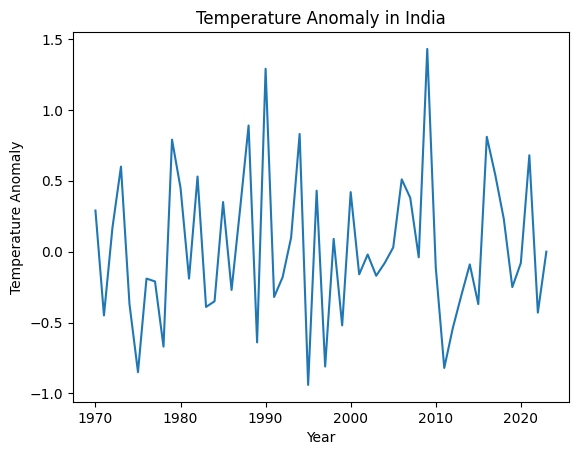

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data (replace 'your_data.csv' with your actual file)
data = pd.read_csv('/content/drive/MyDrive/datasets/surface temperature anomalies by year.csv')

# Melt the dataset to extract years into a separate column
data_melted = pd.melt(data.iloc[1:], id_vars=['Unnamed: 0'], var_name='Year', value_name='Temperature_Anomaly')

# Convert 'Year' and 'Temperature_Anomaly' to numeric
data_melted['Year'] = pd.to_numeric(data_melted['Year'], errors='coerce')
data_melted['Temperature_Anomaly'] = pd.to_numeric(data_melted['Temperature_Anomaly'], errors='coerce')

# Drop rows with any missing values
data_melted = data_melted.dropna()

# Now filter for India
India_data = data_melted[data_melted['Unnamed: 0'] == 'India']

# Now you can plot
plt.plot(India_data['Year'], India_data['Temperature_Anomaly'])
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly in India')
plt.show()

In [5]:
# Define the number of heat wave days and total days
heat_wave_days = 10  # Replace with the actual number of heat wave days
total_days = 30     # Replace with the total number of days in the period

error_rate = (heat_wave_days / total_days) * 100
print(error_rate)

33.33333333333333


 Heat Wave Mitigation Index Calculation

In [10]:
import numpy as np

green_space_coverage = 0.2
reflective_roof_coverage = 0.15
heat_resistant_infra_coverage = 0.1
ghg_reduction_potential = 0.25
energy_eff_improvement_potential = 0.2
public_awareness_improvement_potential = 0.1
cooling_center_coverage = 0.05
public_health_advisory_coverage = 0.1
renewable_energy_potential = 0.3
smart_grid_coverage = 0.1
cooling_t = 0.1

# Calculate heat wave mitigation index
heat_wave_mitigation_index = (green_space_coverage + reflective_roof_coverage + heat_resistant_infra_coverage +
                              ghg_reduction_potential + energy_eff_improvement_potential + public_awareness_improvement_potential +
                              cooling_center_coverage + public_health_advisory_coverage +
                              renewable_energy_potential + smart_grid_coverage + cooling_t)
print(heat_wave_mitigation_index)

1.6500000000000001


 Urban Planning Data Analysis

In [16]:
import pandas as pd

# Load urban planning data
urban_data = pd.read_csv('/content/drive/MyDrive/datasets/indian-cities-dataset.csv')

# Print the columns of the DataFrame to see available columns
print(urban_data.columns)

# Calculate total distance
total_distance = urban_data['Distance'].sum()

print("Total Distance:", total_distance)

# Calculate average distance
average_distance = urban_data['Distance'].mean()

print("Average Distance:", average_distance)

Index(['Origin', 'Destination', 'Distance'], dtype='object')
Total Distance: 60486
Average Distance: 711.6
